#              BANK PREDICTIONS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('bank marketing')

In [3]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.drop ('ID',axis=1, inplace=True)

Text(0.5, 0, 'y:target variable')

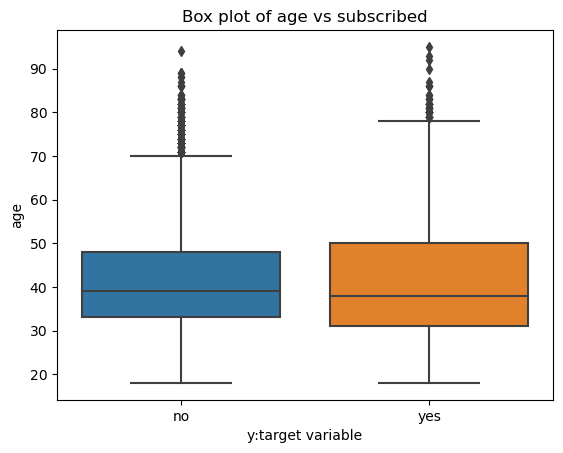

In [9]:
sns.boxplot(y=df['age'], x=df['subscribed'])
plt.title('Box plot of age vs subscribed')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

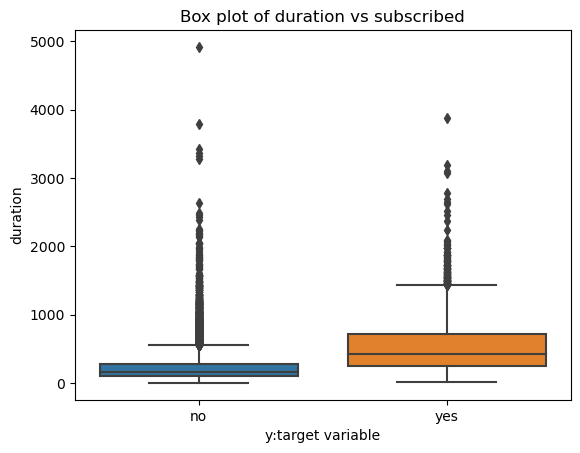

In [10]:
sns.boxplot(y=df['duration'], x=df['subscribed'])
plt.title('Box plot of duration vs subscribed')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

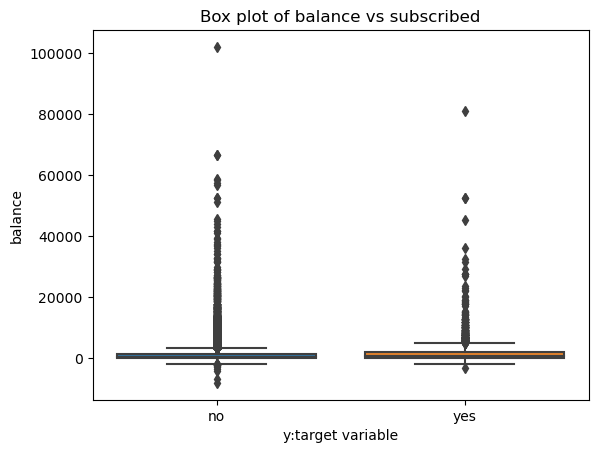

In [11]:
sns.boxplot(y=df['balance'], x=df['subscribed'])
plt.title('Box plot of balance vs subscribed')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

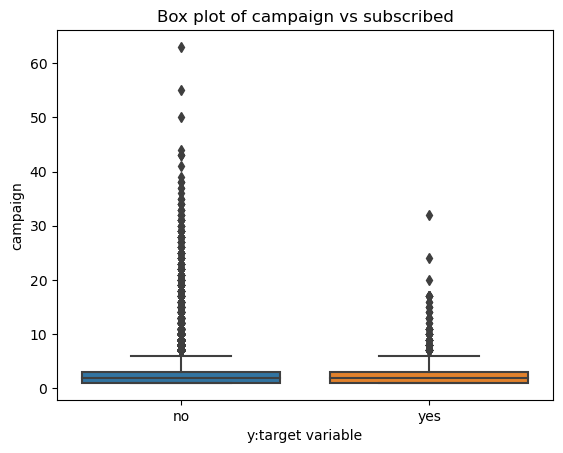

In [13]:
sns.boxplot(y=df['campaign'], x=df['subscribed'])
plt.title('Box plot of campaign vs subscribed')
plt.xlabel('y:target variable')


Text(0.5, 0, 'y:target variable')

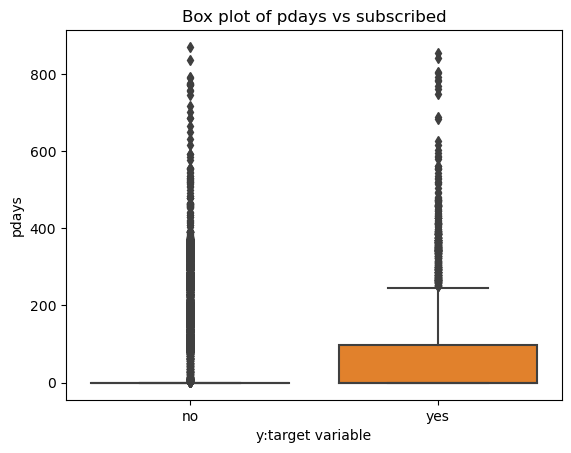

In [14]:
sns.boxplot(y=df['pdays'], x=df['subscribed'])
plt.title('Box plot of pdays vs subscribed')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

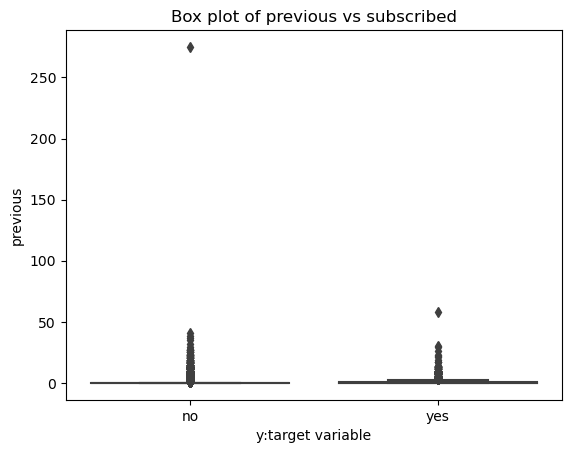

In [15]:
sns.boxplot(y=df['previous'], x=df['subscribed'])
plt.title('Box plot of previous vs subscribed')
plt.xlabel('y:target variable')
          

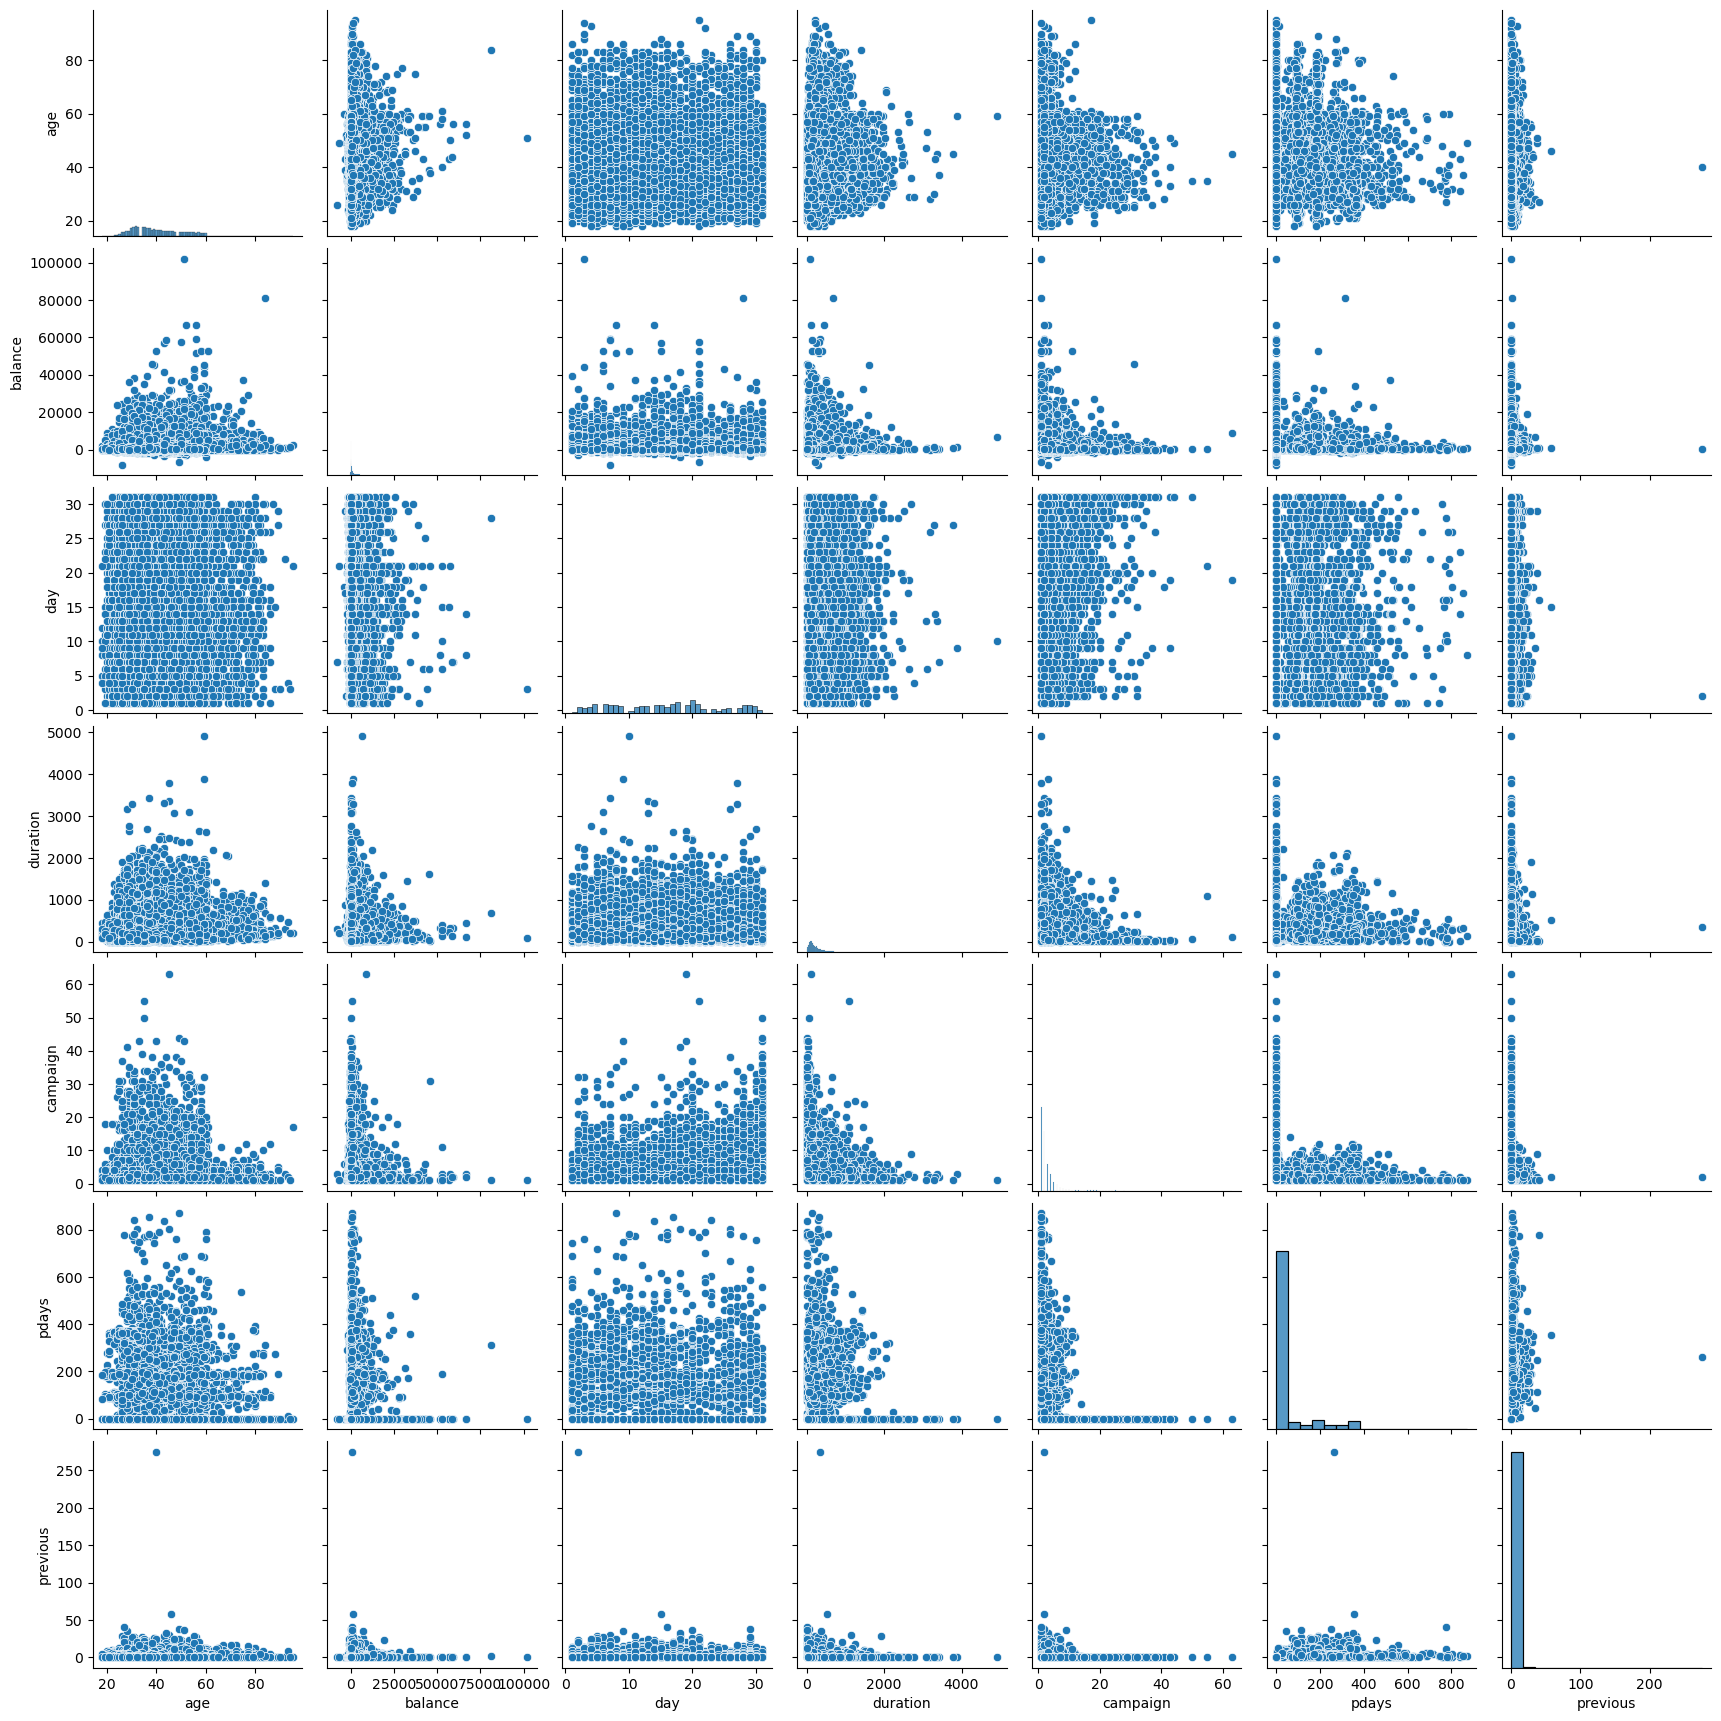

In [17]:
sns.pairplot(data=df)

<Axes: xlabel='education', ylabel='count'>

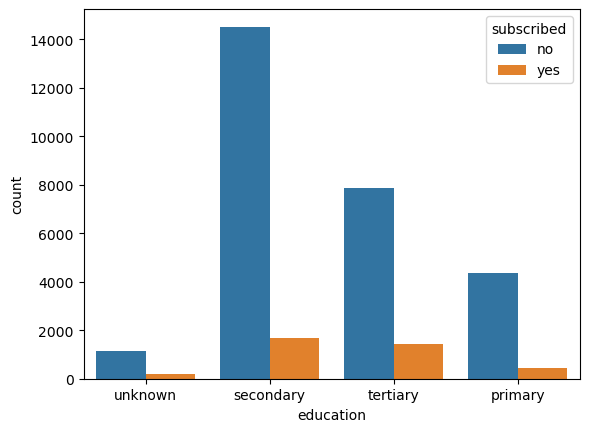

In [18]:
sns.countplot(x=df['education'], data=df, hue=df['subscribed'])

<Axes: xlabel='marital', ylabel='count'>

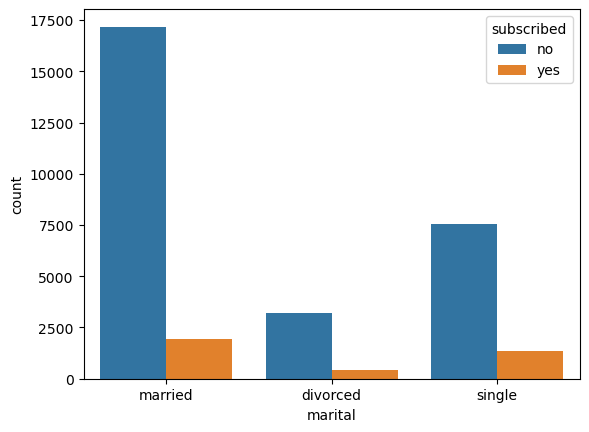

In [19]:
sns.countplot(x=df['marital'], data=df, hue=df['subscribed'])

<Axes: xlabel='contact', ylabel='count'>

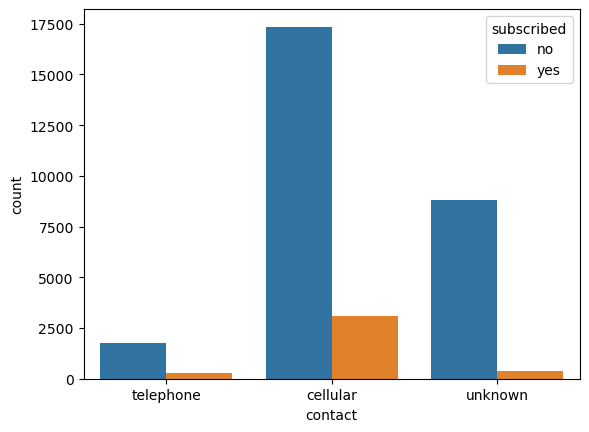

In [20]:
sns.countplot(x=df['contact'], data=df, hue=df['subscribed'])

In [21]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [22]:
df['subscribed'].replace({'yes':1,'no':0},inplace=True)
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


In [23]:
cor=df.corr()

<Axes: >

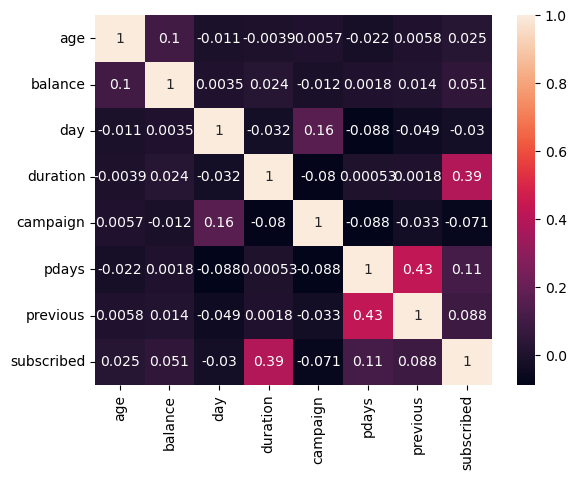

In [24]:
sns.heatmap(cor,annot=True)

# Encoding

In [25]:
lb=LabelEncoder()
for col in df.columns:
    df[col] = lb.fit_transform(df[col])

In [26]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38,0,1,3,0,2719,0,0,1,18,9,43,1,0,0,3,0
1,13,11,1,1,0,822,0,0,0,19,5,90,1,0,0,3,0
2,9,7,1,1,0,1709,1,0,0,17,5,239,0,0,0,3,0
3,39,4,0,2,0,3815,0,0,0,21,6,864,0,79,3,2,1
4,13,9,1,1,0,938,1,0,0,3,3,379,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,11,4,2,2,0,819,1,0,0,11,8,115,1,0,0,3,0
31643,35,4,0,2,0,1199,0,1,0,4,6,437,1,0,0,3,1
31644,14,4,2,2,0,1131,0,0,0,6,1,36,2,0,0,3,0
31645,39,9,1,1,0,1044,1,0,1,14,8,21,6,332,12,0,0


# Removing outliers

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df)).values

In [28]:
threshold=3
dfnew=df[(z<3).all(axis=1)]
dfnew

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38,0,1,3,0,2719,0,0,1,18,9,43,1,0,0,3,0
1,13,11,1,1,0,822,0,0,0,19,5,90,1,0,0,3,0
2,9,7,1,1,0,1709,1,0,0,17,5,239,0,0,0,3,0
3,39,4,0,2,0,3815,0,0,0,21,6,864,0,79,3,2,1
4,13,9,1,1,0,938,1,0,0,3,3,379,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,25,4,2,1,0,3582,0,0,2,19,6,29,3,0,0,3,0
31641,19,9,2,2,0,2124,0,0,2,5,6,441,1,0,0,3,0
31642,11,4,2,2,0,819,1,0,0,11,8,115,1,0,0,3,0
31643,35,4,0,2,0,1199,0,1,0,4,6,437,1,0,0,3,1


In [29]:
x=dfnew.iloc[:,:-1]
y=dfnew.iloc[:,-1]

In [30]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [31]:
x.value_counts()
y.value_counts()

0    24500
1    24500
Name: subscribed, dtype: int64

In [32]:
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)

In [33]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.544725,-1.439873,-0.153171,2.648612,0.0,0.629359,-0.750930,-0.319592,0.737765,0.467130,1.294414,-1.193937,-0.065547,-0.467111,-0.439643,0.489089
1,-0.915748,2.214902,-0.153171,-0.253912,0.0,-0.836345,-0.750930,-0.319592,-0.549187,0.593583,-0.069790,-0.986466,-0.065547,-0.467111,-0.439643,0.489089
2,-1.309423,0.885893,-0.153171,-0.253912,0.0,-0.151010,1.331681,-0.319592,-0.549187,0.340677,-0.069790,-0.328741,-0.661210,-0.467111,-0.439643,0.489089
3,1.643143,-0.110864,-1.822514,1.197350,0.0,1.476176,-0.750930,-0.319592,-0.549187,0.846489,0.271261,2.430172,-0.661210,0.675630,2.342188,-0.585349
4,-0.915748,1.550398,-0.153171,-0.253912,0.0,-0.746718,1.331681,-0.319592,-0.549187,-1.429664,-0.751892,0.289255,-0.661210,-0.467111,-0.439643,0.489089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,-0.718910,-0.110864,-0.153171,-0.253912,0.0,-0.284678,1.331681,-0.319592,-0.549187,1.605206,-0.069790,-0.196313,-0.661210,0.675630,1.414911,-0.585349
48996,-0.325234,-0.110864,-1.822514,1.197350,0.0,-0.175735,-0.750930,-0.319592,-0.549187,1.225848,1.294414,-0.505312,-0.065547,-0.467111,-0.439643,0.489089
48997,-0.817329,-0.110864,-0.153171,-0.253912,0.0,0.626269,-0.750930,-0.319592,-0.549187,-0.544493,0.271261,1.750376,-0.661210,-0.467111,-0.439643,0.489089
48998,-0.128396,1.218145,-0.153171,-0.253912,0.0,-0.689543,-0.750930,-0.319592,-0.549187,-0.291588,0.612312,-0.364055,-0.661210,0.719025,2.342188,-0.585349


In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=42)

In [35]:
lg=LogisticRegression()
gnb=GaussianNB()
knn=KNeighborsClassifier()    
sv=SVC()
rfc=RandomForestClassifier()

In [36]:
models=[lg,gnb,knn,sv,rfc]
for i in models:
    print(i)
    i.fit(xtrain,ytrain)
    pred=i.predict(xtest)
    print(accuracy_score(ytest,pred))
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))

LogisticRegression()
0.8594557823129252
[[6098 1220]
 [ 846 6536]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      7318
           1       0.84      0.89      0.86      7382

    accuracy                           0.86     14700
   macro avg       0.86      0.86      0.86     14700
weighted avg       0.86      0.86      0.86     14700

GaussianNB()
0.8130612244897959
[[5238 2080]
 [ 668 6714]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.79      7318
           1       0.76      0.91      0.83      7382

    accuracy                           0.81     14700
   macro avg       0.83      0.81      0.81     14700
weighted avg       0.82      0.81      0.81     14700

KNeighborsClassifier()
0.8974829931972789
[[6268 1050]
 [ 457 6925]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      7318
           1       0.87      0.94      0.9

# Hyperparameter tuning

In [37]:
param={'criterion':['gini','entropy'],'n_estimators':[100,200,300]}
gd=GridSearchCV(rfc,param)
gd.fit(xtrain,ytrain)
gd.best_params_

{'criterion': 'gini', 'n_estimators': 300}

In [38]:
rfc=RandomForestClassifier(criterion='gini',n_estimators=200)
rfc.fit(xtrain,ytrain)
rfc.predict(xtest)
print(accuracy_score(ytest,pred))

0.9339455782312925


# Test Data

In [39]:
df1=pd.read_csv('bank_test.csv')
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [40]:
df1.drop('ID',axis=1,inplace=True)

In [41]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [42]:
for col in df1.columns:
    df1[col] = lb.fit_transform(df1[col])

# Prediction

In [44]:
p=rfc.predict(df1)
print(p)


[0 1 1 ... 1 0 0]
